In [57]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [45]:
# Load data
df = pd.read_csv("global-data-on-sustainable-energy (1).csv")

In [46]:
# Clean column names
df.columns = df.columns.str.replace('\n', ' ').str.replace('\r', ' ').str.strip()

In [47]:
# Drop non-numeric/identifier columns
df_clean = df.drop(columns=["Entity", "Year", "Density\\n(P/Km2)"], errors='ignore')

In [48]:
# Drop rows with missing values
df_clean = df_clean.dropna()

In [49]:
# Define features and target
X = df_clean.drop(columns=["Access to electricity (% of population)"])
y = df_clean["Access to electricity (% of population)"]


In [50]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [52]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
# Predict
y_pred = model.predict(X_test)


In [54]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [55]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 38.97
R² Score: 0.81


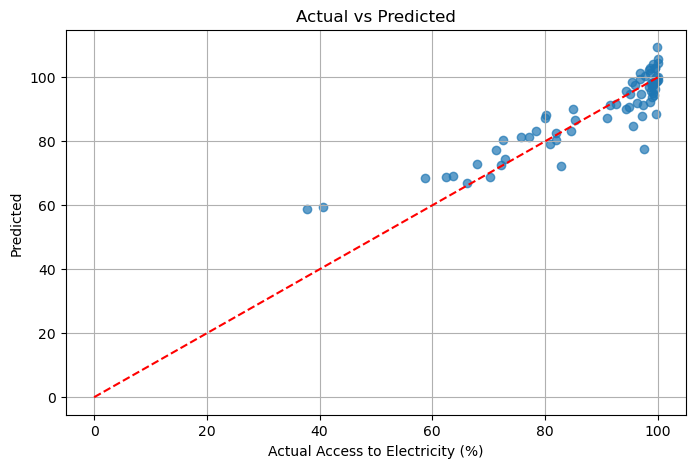

In [56]:
# Optional: Visualize actual vs predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([0, 100], [0, 100], 'r--')
plt.xlabel("Actual Access to Electricity (%)")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()